In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dat=pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/instagram_reach.csv")

In [5]:
dat.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [6]:
dat.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

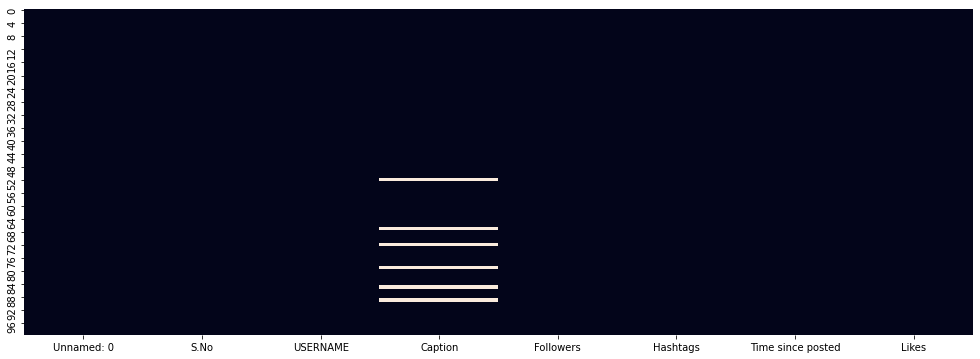

In [9]:
plt.figure(figsize=(17,6))
sns.heatmap(dat.isnull(), cbar=False)

In [11]:
dat.drop(columns=['S.No','Unnamed: 0'],inplace=True)

In [12]:
dat.shape

(100, 6)

In [13]:
dat.dtypes

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [17]:
dat['Time since posted']=dat['Time since posted'].str.extract('(\d+)').astype(int)

In [18]:
dat.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [19]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
dat['USERNAME']= label_encoder.fit_transform(dat['USERNAME']) 

In [27]:
dat.drop(columns="Caption",inplace=True)

In [28]:
dat['Hashtags']= label_encoder.fit_transform(dat['Hashtags']) 

In [29]:
dat.head()

,USERNAME,Followers,Hashtags,Time since posted,Likes
0,64,1600,17,11,139
1,29,880,97,2,23
2,3,255,87,2,25
3,71,340,65,3,49
4,23,304,64,3,30


In [30]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
sel = VarianceThreshold(threshold=0)
sel.fit(dat)

VarianceThreshold(threshold=0)

In [32]:
sum(sel.get_support())

5

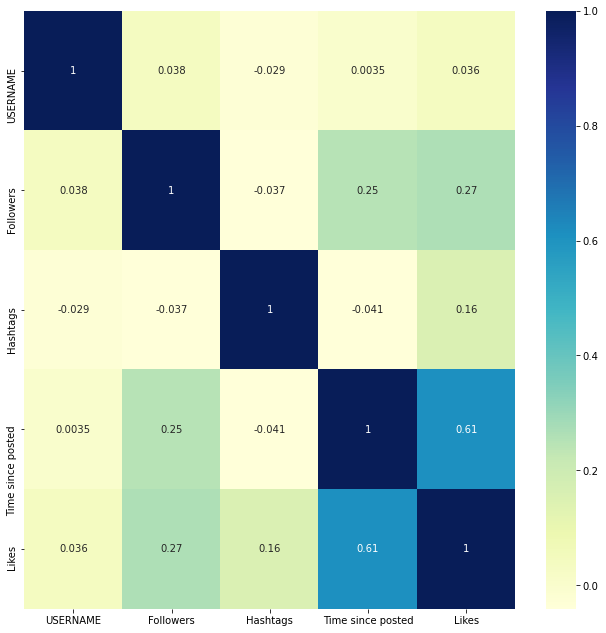

In [33]:
corrmat = dat.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True, cmap="YlGnBu")

In [34]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(dat, 0.9)
len(set(corr_features))

0

In [36]:
corr_features

set()

In [37]:
def normalize(x):
    return ((x-np.min(x))/(max(x)-min(x)))

dat = dat.apply(normalize)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dat.drop(labels=['Likes'], axis=1),
    dat['Likes'],
    test_size=0.2,
    random_state=0)

In [40]:
X_train.shape, X_test.shape

((80, 4), (20, 4))

In [41]:
X_train.head()

,USERNAME,Followers,Hashtags,Time since posted
43,0.117021,0.201338,0.783505,0.000000
62,0.255319,0.126198,0.237113,0.000000
3,0.755319,0.073356,0.670103,0.045455
71,0.648936,0.082943,0.381443,0.000000
45,0.361702,0.024749,0.618557,0.000000


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.sort_values('Actual',ascending = False).head(25)

In [46]:
from sklearn import metrics 
# Print result of MSE
print (metrics.mean_squared_error(y_test, y_pred) )

0.01727272324023999
